In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt

In [2]:


import yfinance as yf
df = yf.download('MSFT', start = '2012-01-01', end='2022-01-01')
df2 = yf.download('AAPL', start = '2012-01-01', end='2022-01-01')
#start = '2010-01-01'
#end = '2019-12-31'

#df = data.DataReader('AAPL' , 'yahoo' ,  start, end)
#df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238758,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738585,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960728,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301884,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008327,59706800


In [4]:
df.reset_index()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238758,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738585,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960728,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301884,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008327,59706800


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238758,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738585,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960728,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301884,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008327,59706800
...,...,...,...,...,...,...
2016-12-23,63.450001,63.540001,62.799999,63.240002,57.634766,12403800
2016-12-27,63.209999,64.070000,63.209999,63.279999,57.671207,11763200
2016-12-28,63.400002,63.400002,62.830002,62.990002,57.406925,14653300


In [6]:
df = df.reset_index()

# Drop the 'Date' column
df = df.drop('Date', axis=1)

# Display the modified DataFrame
print(df.head())


        Open       High        Low      Close  Adj Close    Volume
0  26.549999  26.959999  26.389999  26.770000  21.238758  64731500
1  26.820000  27.469999  26.780001  27.400000  21.738585  80516100
2  27.379999  27.730000  27.290001  27.680000  21.960728  56081400
3  27.530001  28.190001  27.530001  28.110001  22.301884  99455500
4  28.049999  28.100000  27.719999  27.740000  22.008327  59706800


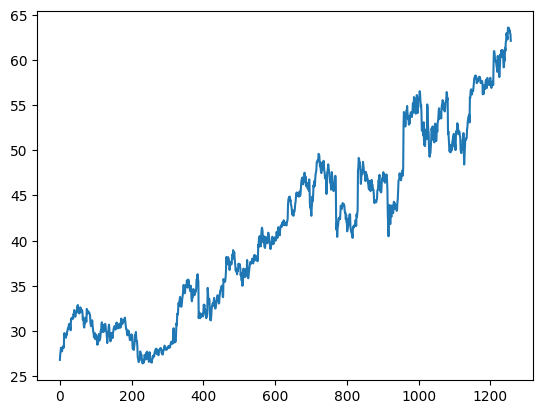

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1253    58.9840
1254    59.0429
1255    59.0932
1256    59.1416
1257    59.1810
Name: Close, Length: 1258, dtype: float64

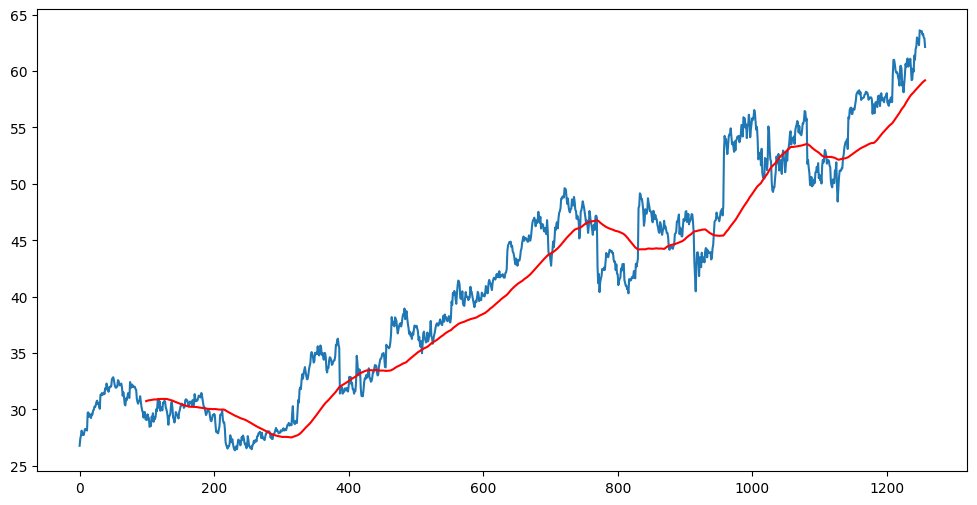

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    55.90105
1254    55.95160
1255    55.99860
1256    56.04135
1257    56.07875
Name: Close, Length: 1258, dtype: float64

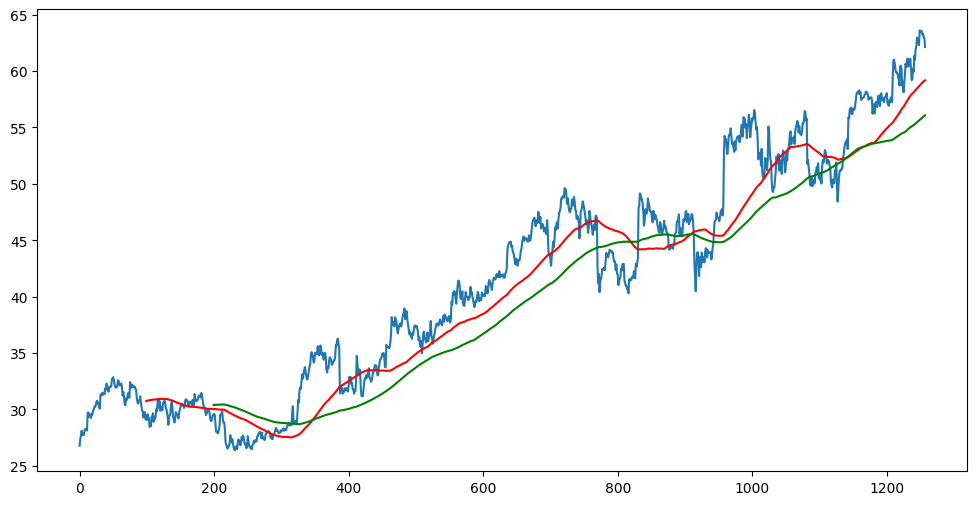

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(1258, 6)

In [13]:
# splitting data into training and testing  // closing  price for a particula day

data_training  = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(880, 1)
(378, 1)


In [14]:
#scaling down data minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array  = scaler.fit_transform(data_training)
data_training_array

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

array([[0.01721169],
       [0.04432009],
       [0.05636831],
       [0.0748709 ],
       [0.05895004],
       [0.06325298],
       [0.05808944],
       [0.07013766],
       [0.08089497],
       [0.08132528],
       [0.08003437],
       [0.07530121],
       [0.14371765],
       [0.14457826],
       [0.12779687],
       [0.13726328],
       [0.13468155],
       [0.12306363],
       [0.13941479],
       [0.13597246],
       [0.15146293],
       [0.15404475],
       [0.16652319],
       [0.16480206],
       [0.17125644],
       [0.18459548],
       [0.18932873],
       [0.17771081],
       [0.18115315],
       [0.16695349],
       [0.15834761],
       [0.21170396],
       [0.20998275],
       [0.21815834],
       [0.21084336],
       [0.2151463 ],
       [0.21987946],
       [0.2142857 ],
       [0.23666093],
       [0.23106708],
       [0.25473322],
       [0.24569712],
       [0.23364881],
       [0.2233218 ],
       [0.23537002],
       [0.24268492],
       [0.2418244 ],
       [0.243

In [16]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
#ml model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model= Sequential()
model.add(LSTM(units=50,activation = 'relu' , return_sequences = True, input_shape = (x_train.shape[1] , 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50

25/25 [==============================] - 12s 172ms/step - loss: 0.1068
Epoch 2/50
25/25 [==============================] - 4s 158ms/step - loss: 0.0195
Epoch 3/50
25/25 [==============================] - 4s 163ms/step - loss: 0.0172
Epoch 4/50
25/25 [==============================] - 4s 161ms/step - loss: 0.0160
Epoch 5/50
25/25 [==============================] - 4s 168ms/step - loss: 0.0136
Epoch 6/50
25/25 [==============================] - 4s 173ms/step - loss: 0.0131
Epoch 7/50
25/25 [==============================] - 4s 169ms/step - loss: 0.0119
Epoch 8/50
25/25 [==============================] - 4s 165ms/step - loss: 0.0112
Epoch 9/50
25/25 [==============================] - 4s 164ms/step - loss: 0.0121
Epoch 10/50
25/25 [==============================] - 4s 165ms/step - loss: 0.0120
Epoch 11/50
25/25 [==============================] - 4s 164ms/step - loss: 0.0108
Epoch 12/50
25/25 [==============================] - 4s 163ms/step - loss: 0.0121
Epoch 13/50
25/25 [===

In [21]:
model.save('keras_model.hS')

INFO:tensorflow:Assets written to: keras.hS\assets


INFO:tensorflow:Assets written to: keras.hS\assets


In [22]:
data_training.tail(100)

,Close
780,42.599998
781,42.380001
782,43.090000
783,43.869999
784,43.580002
...,...
875,45.259998
876,44.369999
877,44.150002
878,44.450001


In [23]:
past_100_days = data_training.tail(100)

In [24]:
#final_df = past_100_days.append(data_testing, ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [25]:
final_df.head

<bound method NDFrame.head of          Close
0    42.599998
1    42.380001
2    43.090000
3    43.869999
4    43.580002
..         ...
473  63.240002
474  63.279999
475  62.990002
476  62.900002
477  62.139999

[478 rows x 1 columns]>

In [26]:
input_data = scaler.fit_transform(final_df)
input_data

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_

array([[0.09901405],
       [0.08958424],
       [0.12001712],
       [0.15345042],
       [0.1410202 ],
       [0.1388769 ],
       [0.13759106],
       [0.15302186],
       [0.16545225],
       [0.16288039],
       [0.15859413],
       [0.16159455],
       [0.15259314],
       [0.15387915],
       [0.12816109],
       [0.11873128],
       [0.12087441],
       [0.08872696],
       [0.10972987],
       [0.074582  ],
       [0.07243887],
       [0.03129017],
       [0.04672097],
       [0.05443637],
       [0.0604372 ],
       [0.09472779],
       [0.08572654],
       [0.11101588],
       [0.11015859],
       [0.11187316],
       [0.05014995],
       [0.03943413],
       [0.02914704],
       [0.02871831],
       [0.01585936],
       [0.01843122],
       [0.        ],
       [0.05400765],
       [0.05315036],
       [0.04843538],
       [0.05100723],
       [0.06129449],
       [0.0630089 ],
       [0.05829407],
       [0.08444053],
       [0.08015427],
       [0.05700806],
       [0.112

In [27]:
input_data.shape

(478, 1)

In [38]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [39]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 100, 1)
(378,)


In [40]:
#making prediction
y_predicted = model.predict(x_test)

12/12 [==============================] - 1s 57ms/step


In [41]:
y_predicted.shape

(378, 1)

In [42]:
y_test

array([0.17573934, 0.17188164, 0.16930995, 0.18131161, 0.18516931,
       0.22503217, 0.22846114, 0.23446197, 0.27303898, 0.27132441,
       0.28418336, 0.29961416, 0.22503217, 0.24946422, 0.24217738,
       0.21688804, 0.21645948, 0.25717962, 0.28246895, 0.27475355,
       0.27946854, 0.31075871, 0.31247328, 0.27132441, 0.27646812,
       0.30175746, 0.26232317, 0.27646812, 0.2760394 , 0.2876125 ,
       0.30132873, 0.2991856 , 0.27089585, 0.23017571, 0.11915984,
       0.05957992, 0.0077154 , 0.10372903, 0.15473643, 0.15602228,
       0.13844834, 0.06558075, 0.13159023, 0.13759106, 0.09944277,
       0.15430771, 0.11915984, 0.12858981, 0.13673377, 0.11787399,
       0.15816541, 0.17188164, 0.16973851, 0.13673377, 0.16373768,
       0.15473643, 0.15345042, 0.15516499, 0.15645084, 0.12858981,
       0.1350192 , 0.17016707, 0.18516931, 0.22631801, 0.27175314,
       0.27689668, 0.27903981, 0.30690101, 0.29232749, 0.2876125 ,
       0.28289752, 0.27389627, 0.28804106, 0.3094727 , 0.31418

In [43]:
y_predicted

array([[0.19627221],
       [0.189211  ],
       [0.18149734],
       [0.17351507],
       [0.165794  ],
       [0.15877686],
       [0.15322012],
       [0.14993614],
       [0.14958297],
       [0.1530432 ],
       [0.16038005],
       [0.17103525],
       [0.18433502],
       [0.19853432],
       [0.21211623],
       [0.22379455],
       [0.2326918 ],
       [0.23837511],
       [0.24127722],
       [0.24237294],
       [0.24255612],
       [0.24255273],
       [0.24321443],
       [0.24511352],
       [0.24804085],
       [0.25146934],
       [0.2552032 ],
       [0.25866175],
       [0.26148146],
       [0.26348114],
       [0.26475534],
       [0.26564112],
       [0.26644415],
       [0.26705006],
       [0.2668176 ],
       [0.2643295 ],
       [0.2591661 ],
       [0.2511875 ],
       [0.24060023],
       [0.22796723],
       [0.21372074],
       [0.19848838],
       [0.18314645],
       [0.1682671 ],
       [0.154919  ],
       [0.14326714],
       [0.13350679],
       [0.125

In [44]:
#scaling up

scaler.scale_

array([0.04286327])

In [45]:
scale_factor=1/0.04286327
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor
y_predicted

array([[ 4.57903  ],
       [ 4.4142923],
       [ 4.2343326],
       [ 4.048106 ],
       [ 3.8679738],
       [ 3.704264 ],
       [ 3.574625 ],
       [ 3.49801  ],
       [ 3.4897704],
       [ 3.5704975],
       [ 3.7416663],
       [ 3.990252 ],
       [ 4.3005357],
       [ 4.6318054],
       [ 4.9486713],
       [ 5.2211266],
       [ 5.428699 ],
       [ 5.5612907],
       [ 5.628997 ],
       [ 5.65456  ],
       [ 5.658834 ],
       [ 5.658755 ],
       [ 5.674192 ],
       [ 5.7184978],
       [ 5.7867928],
       [ 5.8667793],
       [ 5.95389  ],
       [ 6.034578 ],
       [ 6.100362 ],
       [ 6.1470146],
       [ 6.1767416],
       [ 6.197407 ],
       [ 6.216141 ],
       [ 6.2302775],
       [ 6.224854 ],
       [ 6.1668067],
       [ 6.0463443],
       [ 5.8602037],
       [ 5.613203 ],
       [ 5.3184752],
       [ 4.9861045],
       [ 4.6307335],
       [ 4.272806 ],
       [ 3.925671 ],
       [ 3.61426  ],
       [ 3.342422 ],
       [ 3.1147132],
       [ 2.92

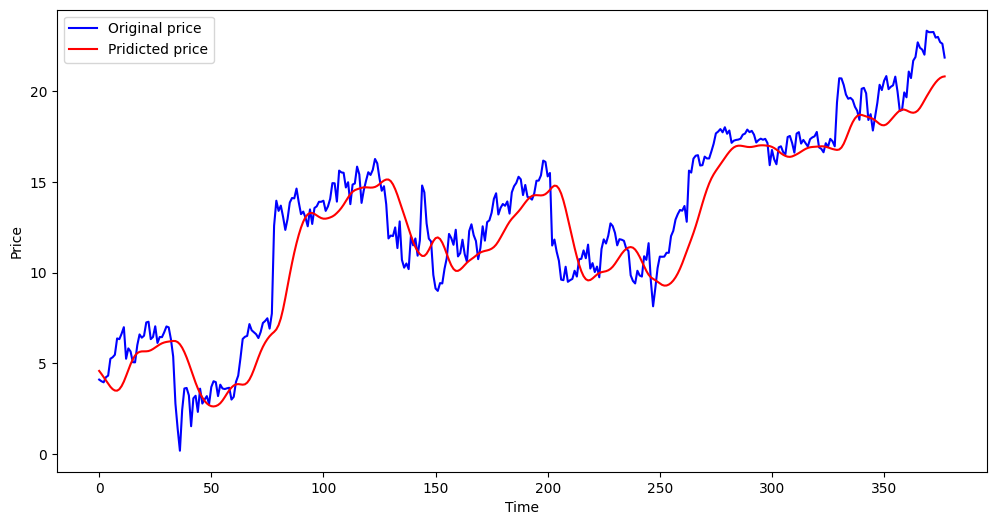

In [48]:
plt.figure(figsize = (12,6))
plt.plot(y_test,'b',label = 'Original price')
plt.plot(y_predicted,'r',label = 'Pridicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

In [47]:
y_test

array([ 4.09999846,  4.00999831,  3.95000075,  4.22999953,  4.31999968,
        5.24999998,  5.32999799,  5.46999738,  6.36999891,  6.32999799,
        6.62999723,  6.98999784,  5.24999998,  5.81999967,  5.64999769,
        5.05999754,  5.04999922,  5.99999998,  6.59000013,  6.40999982,
        6.52000043,  7.24999997,  7.29000089,  6.32999799,  6.45000074,
        7.04000089,  6.11999891,  6.45000074,  6.4399986 ,  6.70999906,
        7.02999875,  6.97999951,  6.31999967,  5.36999891,  2.77999877,
        1.38999938,  0.1800003 ,  2.41999816,  3.6100006 ,  3.63999937,
        3.22999953,  1.52999877,  3.06999968,  3.20999907,  2.31999969,
        3.59999846,  2.77999877,  2.99999999,  3.18999861,  2.74999999,
        3.68999861,  4.00999831,  3.95999907,  3.18999861,  3.81999968,
        3.6100006 ,  3.579998  ,  3.61999892,  3.6499977 ,  2.99999999,
        3.1499977 ,  3.96999739,  4.31999968,  5.27999876,  6.34000013,
        6.45999906,  6.5099983 ,  7.15999982,  6.81999967,  6.70